In [26]:
import ROOT

# Open the file

In [42]:
name = "TTToSemiLeptonic"
path = "bkg_root/"
full_name = path + name + ".root"

f = ROOT.TFile(full_name,"READ") # read the cut-flow root file
#fout = ROOT.TFile("cutflowSum.root","RECREATE")
#ROOT.gDirectory.pwd()
#f.cd("demo")
#ROOT.gDirectory.pwd()
#f.ls()

# Load histograms

In [43]:
h_RecDiMuonM_Nocut = ROOT.TH1F()
h_RecDiMuonM_pt = ROOT.TH1F()
h_RecDiMuonM_eta = ROOT.TH1F()
h_RecDiMuonM_iso = ROOT.TH1F()
h_RecDiMuonM_dxy = ROOT.TH1F()
h_RecDiMuonM = ROOT.TH1F()

# Caution: Because I changed the path of histograms after scaling or merging, this part must be checked before running.

# bkg analysis
h_RecDiMuonM_Nocut = f.Get("h_RecDiMuonM_Nocut")
# sig analysis
#h_RecDiMuonM_Nocut = f.Get("demo/h_RecDiMuonM_nocut")

h_RecDiMuonM_pt = f.Get("h_RecDiMuonM_pt")
h_RecDiMuonM_eta = f.Get("h_RecDiMuonM_eta")
h_RecDiMuonM_iso = f.Get("h_RecDiMuonM_iso")
h_RecDiMuonM_dxy = f.Get("h_RecDiMuonM_dxy")
h_RecDiMuonM = f.Get("h_RecDiMuonM")

h_RecDiMuonM_pt.Print() # check whether histograms are read successfully

TH1.Print Name  = h_RecDiMuonM_pt, Entries= 1027, Total sum= 1027.75


# Scale histograms

In [52]:
# the cell shouldn't be run when the histogram has been scaled!!!

# normalize histograms to 59.74 /fb
scale = 59.74/16956

for i in [h_RecDiMuonM_Nocut,h_RecDiMuonM_pt,h_RecDiMuonM_eta,h_RecDiMuonM_iso,h_RecDiMuonM_dxy,h_RecDiMuonM]:
    i.Scale(scale)

# Set the style of histograms and output

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file cutflowHist_TTToSemiLeptonic.pdf has been created


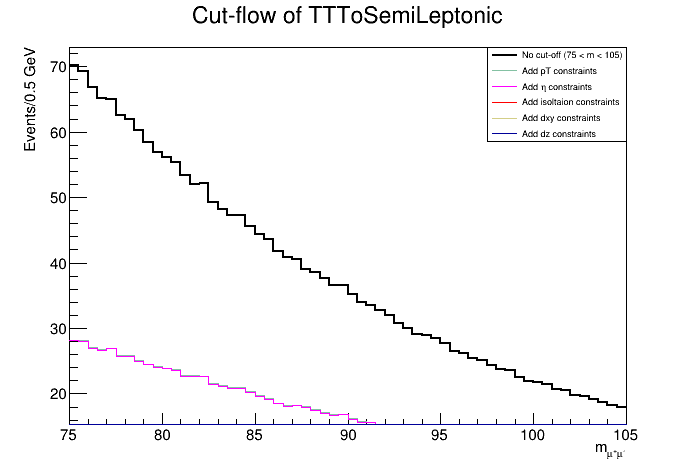

In [44]:
h_RecDiMuonM_Nocut.SetLineColor(2)

c = ROOT.TCanvas('c')
ROOT.gStyle.SetOptStat(ROOT.kFALSE)

title = "Cut-flow of " + name

h_RecDiMuonM_Nocut.SetLineColor(1)
h_RecDiMuonM_Nocut.SetLineWidth(2)
h_RecDiMuonM_Nocut.GetYaxis().SetTitle("Events/0.5 GeV")
h_RecDiMuonM_Nocut.SetTitle(title)
h_RecDiMuonM_Nocut.Draw("HIST")

h_RecDiMuonM_pt.SetLineColor(30)
h_RecDiMuonM_pt.Draw("HIST SAME")

h_RecDiMuonM_eta.SetLineColor(6)
h_RecDiMuonM_eta.Draw("HIST SAME")

h_RecDiMuonM_iso.SetLineColor(2)
h_RecDiMuonM_iso.Draw("HIST SAME")
    
h_RecDiMuonM_dxy.SetLineColor(41)
h_RecDiMuonM_dxy.Draw("HIST SAME")

h_RecDiMuonM.Draw("HIST SAME")

#ROOT.gPad.SetLogy()

l = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
l.AddEntry(h_RecDiMuonM_Nocut, "No cut-off (75 < m < 105)", "l")
l.AddEntry(h_RecDiMuonM_pt, "Add pT constraints", "l")
l.AddEntry(h_RecDiMuonM_eta, "Add #eta constraints", "l")
l.AddEntry(h_RecDiMuonM_iso, "Add isoltaion constraints", "l")
l.AddEntry(h_RecDiMuonM_dxy, "Add dxy constraints", "l")
l.AddEntry(h_RecDiMuonM, "Add dz constraints", "l")
l.Draw("SAME");

c.Draw()

save_name = "cutflowHist_" + name + ".pdf"

c.SaveAs(save_name)